In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
import statsmodels.api as sm

In [6]:
# df = pd.read_excel("../models/data/EsaveExportSmall.xls") # for github and small dataset
df = pd.read_excel("data/EsaveExport_Trondheim Kommune_Trondheim_10121314.xls") # local file. use above if not you are not me
df.rename(columns={df.columns[0]: "datetime"}, inplace=True)
datetime = df.pop("datetime")
df = df.dropna(axis=1, how="any")
df = df.applymap(lambda cell: float(str(cell).replace(",", ".")))
channels = df.shape[1] # for later

In [7]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

-8.396527777777777


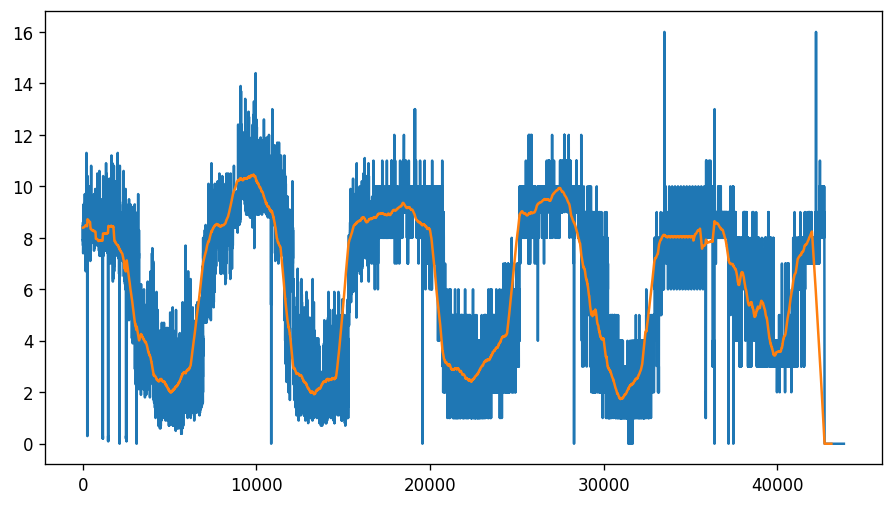

In [8]:
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})

values = df.values
channel = 30
x = values[:,channel]
avgs = moving_average(x, 24*30)
print(avgs[-1] - avgs[0])
plt.plot(values[:,channel])
plt.plot(avgs)
plt.show()

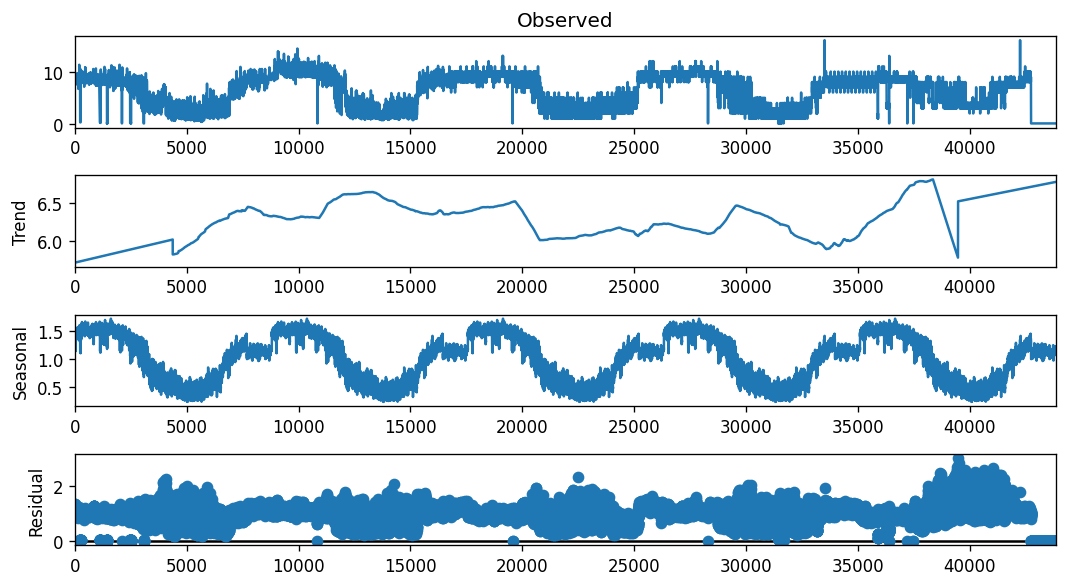

In [9]:
x[np.where(x == 0)] = 0.1
decomposition = sm.tsa.seasonal_decompose(x, model='multiplicative',extrapolate_trend='freq', period=24*365)
fig = decomposition.plot()
plt.show()

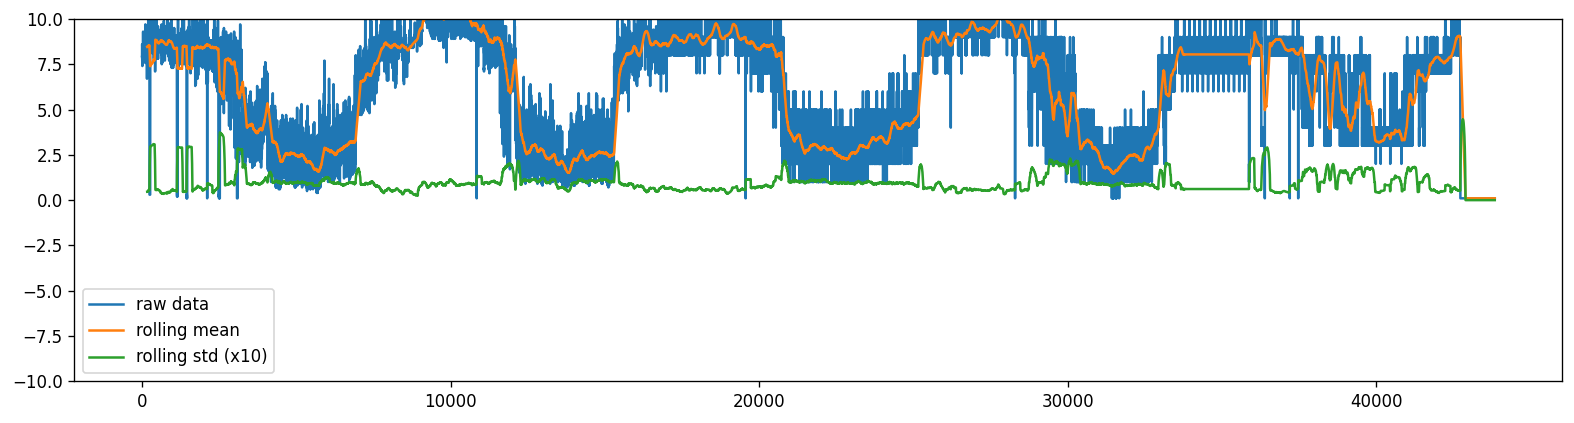

In [10]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=24*7).mean() 
    rolstd = pd.Series(timeseries).rolling(window=24*7).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.set_ylim(-10,10)
    ax.legend()
    
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
test_stationarity(x,'raw data')

In [11]:
x = pd.Series(x)
detrend = (x - x.rolling(window=24).mean())/x.rolling(window=24).std()
xlag =  x - x.shift(24)
both = detrend - detrend.shift(24)

ADF_test(x,'raw data')
print("\n")
ADF_test(detrend,'de-trended data')
print("\n")
ADF_test(xlag,'differenced data')
print("\n")
ADF_test(both,'de-trended + differenced data')

 > Is the raw data stationary ?
Test statistic = -4.487
P-value = 0.000
Critical values :
	1%: -3.430499321474984 - The data is  stationary with 99% confidence
	5%: -2.8616059968192618 - The data is  stationary with 95% confidence
	10%: -2.5668051279600483 - The data is  stationary with 90% confidence


 > Is the de-trended data stationary ?
Test statistic = -32.415
P-value = 0.000
Critical values :
	1%: -3.4304994443243553 - The data is  stationary with 99% confidence
	5%: -2.861606051114624 - The data is  stationary with 95% confidence
	10%: -2.5668051568599415 - The data is  stationary with 90% confidence


 > Is the differenced data stationary ?
Test statistic = -31.567
P-value = 0.000
Critical values :
	1%: -3.4304994101792583 - The data is  stationary with 99% confidence
	5%: -2.8616060360236197 - The data is  stationary with 95% confidence
	10%: -2.5668051488274246 - The data is  stationary with 90% confidence


 > Is the de-trended + differenced data stationary ?
Test statistic

In [12]:
# ADF Test
result = adfuller(df.iloc[:,0], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'{key}, {value}')
    
# KPSS Test
result = kpss(df.iloc[:,0], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.960392547344362
p-value: 8.254689604820795e-15
Critial Values:
1%, -3.4304993351149395
Critial Values:
5%, -2.861606002847671
Critial Values:
10%, -2.566805131168801

KPSS Statistic: 0.440968
p-value: 0.059497
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


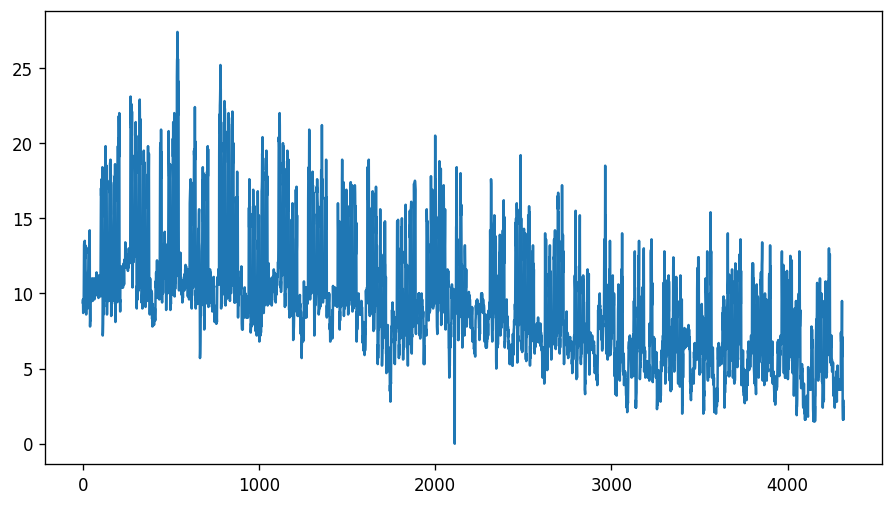

In [13]:
plt.plot(df.iloc[:24*180,0])
plt.show()

In [14]:
# ADF Test
result = adfuller(df.iloc[:24*180,0], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'{key}, {value}')
    
# KPSS Test
result = kpss(df.iloc[:24*180,0], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.605098465645005
p-value: 0.00012640331772780007
Critial Values:
1%, -3.431875937258768
Critial Values:
5%, -2.862214274623216
Critial Values:
10%, -2.567128921428161

KPSS Statistic: 8.444764
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Jacob\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
